# Data Science Part time 06 Phase 2, Group 12

**Students names:**

- Felix Mburu Njoroge
- Winnie Osolo
- Violet Musyoka
- Alex Mwaura
- Lydia M


## **Overview**
A commercial real estate agency is interested in investing in the real estate within King County. Their main concern is having and overview of prices of houses within the area and identify some of the attributes that influence the pricing strategy.

## **Business Understanding and Problem**

A real estate agency wants to come up with a pricing strategy. They want to do this by analyzing the factors that most significantly impact house prices.

In order to achieve this, we are required to come up with a model that is capable of deducing the main factors that influence the house prices.The client seeks to utilize accurate and representative data pertaining to thne real estate market in King County. This data contains historical sales, size of the property and other pertinet features.

## **Objectives**

To support the real estate agency in developing a pricing strategy through regression analysis, focusing on the factors that significantly impact house prices, the following three objectives or questions can be addressed using the dataset:

1. **What are the key predictors of house prices?**
   - Objective: Identify and quantify the impact of various features (like square footage, number of bedrooms and bathrooms, location, etc.) on the house prices. This involves using regression analysis to determine which variables most strongly correlate with the price of a house.
   - Key Analysis: Conduct multiple linear regression to assess the relationship between house prices and potential predictor variables. Evaluate the coefficients to determine the impact of each feature on the price.

2. **How does location affect house prices within the region?**
   - Objective: Analyze the geographical distribution of house prices to understand how different locations (e.g., zip codes, proximity to waterfronts) influence the valuation of properties. This will help in understanding location premiums or penalties.

3. **Can we predict the price of a house based on its attributes?**
   - Objective: Develop a predictive model that estimates the price of a house based on its features, such as size, age, condition, and neighborhood characteristics. The goal is to create a reliable pricing tool that the agency can use for setting competitive prices.
   - Key Analysis: Implement a regression model (like multiple linear regression, polynomial regression to predict house prices. Evaluate the model’s accuracy and adjust it to improve prediction performance.

These objectives will guide the analysis of the data and the development of a regression-based pricing model, helping the real estate agency to set competitive and market-aligned prices for their listings.

## Data Understanding

For the project, we will use the King County House Sales dataset, which contains information about house sales in northwestern county.


### Data Preparation
In our data preparation, we imported the necessary libraries, loaded the data, data cleaning which involved dealing with null values, outliers and duplicates then encoding the data.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format


In [ ]:
#data loading, loading it as a pandas data frame

df = pd.read_csv("/content/kc_house_data.csv")

## Previewing the Data

In [ ]:
#inspect
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
#check decriptive stats
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [ ]:
#dropping columns, justfication:
# id and date columns are not useful for analyisis, there are no insights to get from them
# sqft_basement has too many 0s on inspection
# yr_renovated has too many missing values
df = df.drop(columns=['id', 'date', 'yr_renovated', 'sqft_basement'])

## Data Cleaning

#### 1. Checking for Missing Values

In [ ]:
#check for missing values
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
#check percentage of missing values
# create a function to check the percentage of missing values
def missing_values(data):
    miss = data.isnull().sum().sort_values(ascending = False)
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)
    return missing

missing_data = missing_values(df)
missing_data

,index,Missing Values,Percentage
0,waterfront,2376,0.11
1,view,63,0.00


The nature of the data in waterfront and view means that it would not make much sense to impute because they are categorical variables The best option is to drop the entries with missing values

In [ ]:
#dropping rows with missing values (waterfront, view)
df = df.dropna()

In [ ]:
#checking again for missing values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19164 entries, 1 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19164 non-null  float64
 1   bedrooms       19164 non-null  int64  
 2   bathrooms      19164 non-null  float64
 3   sqft_living    19164 non-null  int64  
 4   sqft_lot       19164 non-null  int64  
 5   floors         19164 non-null  float64
 6   waterfront     19164 non-null  object 
 7   view           19164 non-null  object 
 8   condition      19164 non-null  object 
 9   grade          19164 non-null  object 
 10  sqft_above     19164 non-null  int64  
 11  yr_built       19164 non-null  int64  
 12  zipcode        19164 non-null  int64  
 13  lat            19164 non-null  float64
 14  long           19164 non-null  float64
 15  sqft_living15  19164 non-null  int64  
 16  sqft_lot15     19164 non-null  int64  
dtypes: float64(5), int64(8), object(4)
memory usage: 2.6+ M

## 2. Checking for Outliers

# We'll check outliers in the following columns: price, bedrooms, bathrooms, sqft_living, sqft_lot, floors,sqft_above, sqft_basement bacause they are numerical, since they are numerical variables

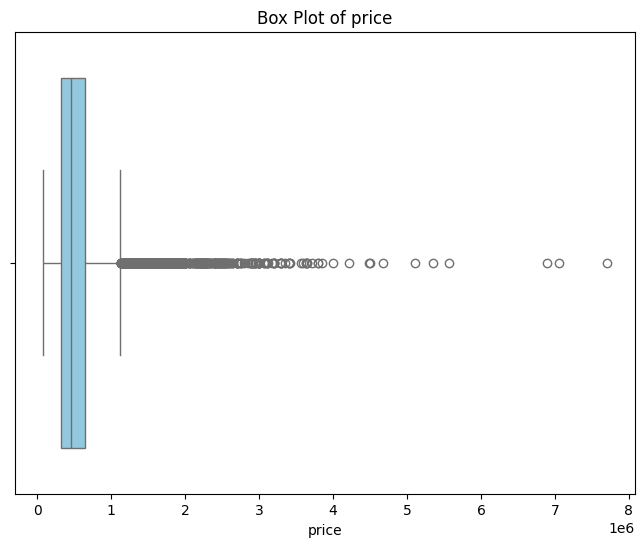

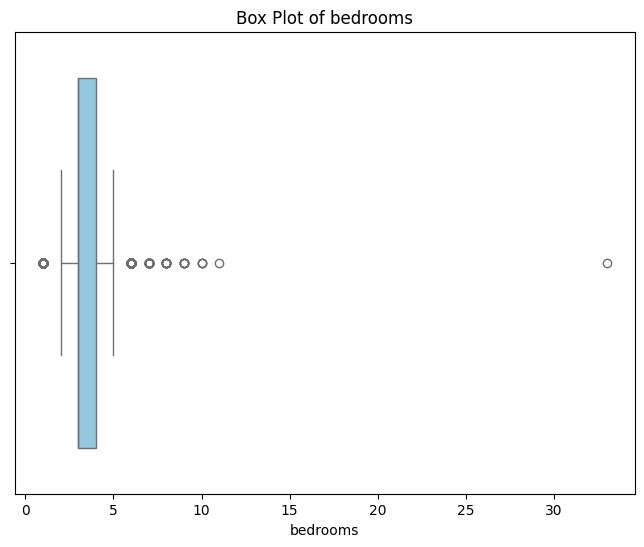

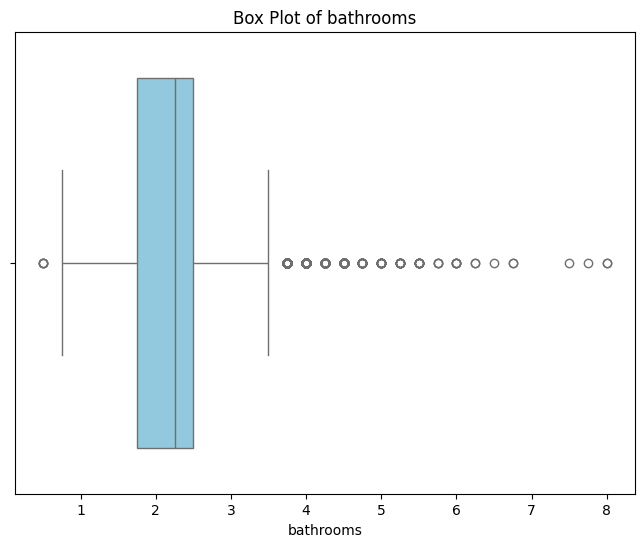

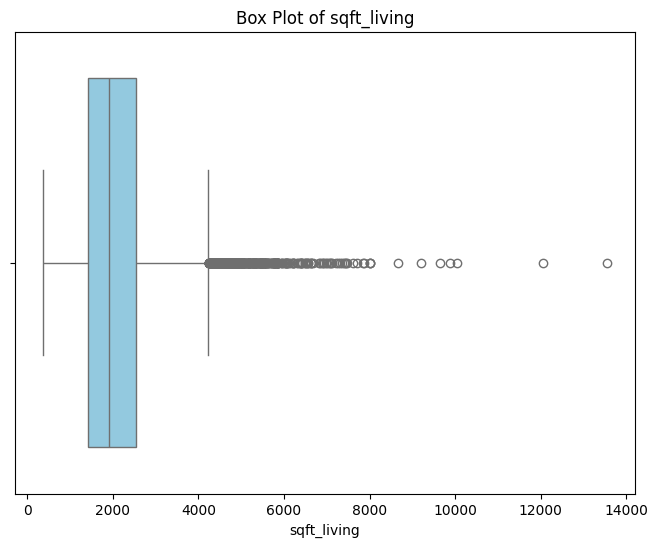

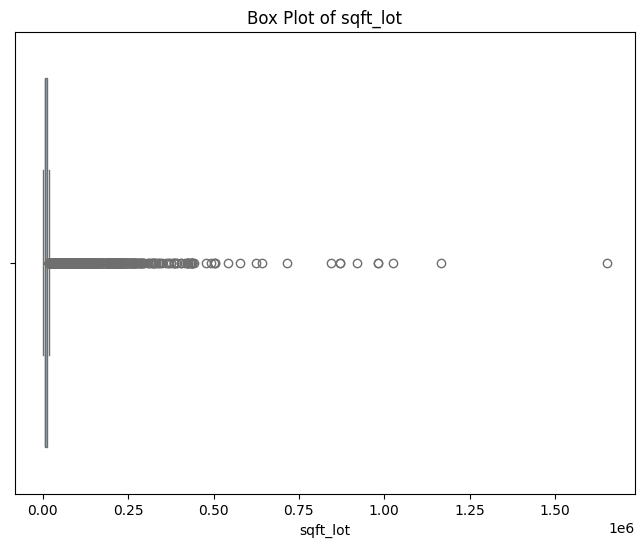

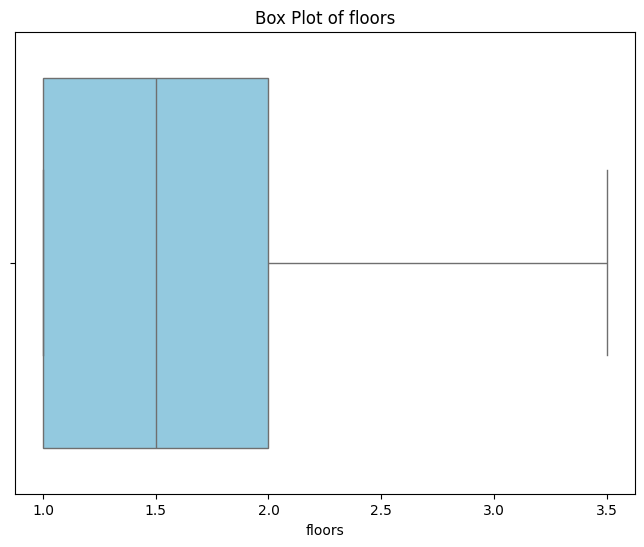

In [ ]:
# the columns to check for outliers are price, bedrooms, bathrooms, sqft_living, sqft_lot, floors,sqft_above, sqft_basement
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Box Plot of price')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bedrooms'], color='skyblue')
plt.title('Box Plot of bedrooms')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bathrooms'], color='skyblue')
plt.title('Box Plot of bathrooms')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sqft_living'], color='skyblue')
plt.title('Box Plot of sqft_living')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sqft_lot'], color='skyblue')
plt.title('Box Plot of sqft_lot')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['floors'], color='skyblue')
plt.title('Box Plot of floors')
plt.show()

The outlier that appear unusual is 30 bedrooms. This is quite extreme.
Although the other columns have outliers, it doesn't mean they have to be dropped, they are well within the realm of possibility

In [ ]:
#dropping the outlier with more than 30 bedrooms since it's extreme
df = df[df['bedrooms'] <= 30]

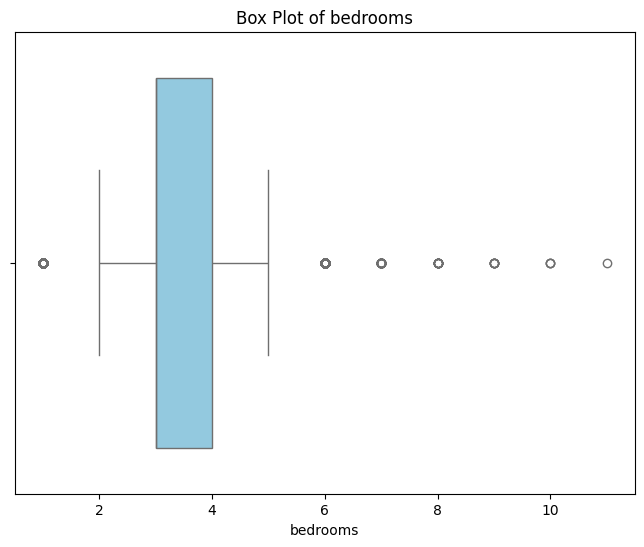

In [ ]:
#bedrooms after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bedrooms'], color='skyblue')
plt.title('Box Plot of bedrooms')
plt.show()

Although the other columns have outliers, it doesn't mean they have to be dropped

#### 3. Checking for Duplicate Rows

In [ ]:
df.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
21591    False
21592    False
21593    False
21594    False
21596    False
Length: 19163, dtype: bool

There are no duplicates

#### 4. Ensuring Correct Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19163 entries, 1 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19163 non-null  float64
 1   bedrooms       19163 non-null  int64  
 2   bathrooms      19163 non-null  float64
 3   sqft_living    19163 non-null  int64  
 4   sqft_lot       19163 non-null  int64  
 5   floors         19163 non-null  float64
 6   waterfront     19163 non-null  object 
 7   view           19163 non-null  object 
 8   condition      19163 non-null  object 
 9   grade          19163 non-null  object 
 10  sqft_above     19163 non-null  int64  
 11  yr_built       19163 non-null  int64  
 12  zipcode        19163 non-null  int64  
 13  lat            19163 non-null  float64
 14  long           19163 non-null  float64
 15  sqft_living15  19163 non-null  int64  
 16  sqft_lot15     19163 non-null  int64  
dtypes: float64(5), int64(8), object(4)
memory usage: 2.6+ M

Floors and bathrooms are named as float data type. This is incorrect and needs to be addressed since they can only be integers.

In [ ]:
df['floors'] = df['floors'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)

## Exploratory Data Analysis (EDA)
In this section we will perforn EDA to understand the data better and discover any patterns, trends that may exist using univariate, bivariate and multivariate analysis. We will use desriptive statistics and visualizations to summarise the main characteristics and examine relationships between the features and our target variable(price).
- Measures of Central Tendancy and Dispersion
- Univariate
- Bivariate - correlation
- Feature engineering
- Categorical Data Encoding- one hot encoding, and label Encoder



### Analysis of the Numerical and Descriptive data

In [ ]:
num_attributes = df.select_dtypes(include=['int64','float64'])
cat_attributes = df.select_dtypes(exclude=['int64','float64'])

In [ ]:
num_attributes.sample()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
923,451000.00,3,1,1560,4049,1,1000,1926,98126,47.57,-122.38,1430,3738


In [ ]:
cat_attributes.sample()

,waterfront,view,condition,grade
18601,NO,NONE,Average,8 Good


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,19163.00,19163.00,19163.00,19163.00,19163.00,19163.00,19163.00,19163.00,19163.00,19163.00,19163.00,19163.00,19163.00
mean,541443.82,3.37,1.75,2082.06,15062.21,1.45,1791.46,1971.04,98077.73,47.56,-122.21,1987.26,12798.08
std,370909.93,0.90,0.73,921.94,40773.16,0.55,831.78,29.39,53.45,0.14,0.14,684.79,27553.29
min,78000.00,1.00,0.00,370.00,520.00,1.00,370.00,1900.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.00,1430.00,5040.00,1.00,1200.00,1951.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.00,1920.00,7620.00,1.00,1560.00,1975.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,643975.00,4.00,2.00,2550.00,10720.00,2.00,2218.50,1997.00,98117.00,47.68,-122.12,2360.00,10093.50
max,7700000.00,11.00,8.00,13540.00,1651359.00,3.00,9410.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


### 1.Univariate Analysis
- Summary ststistic of our main variable of interest - Price


count     19163.00
mean     541443.82
std      370909.93
min       78000.00
25%      322000.00
50%      450000.00
75%      643975.00
max     7700000.00
Name: price, dtype: float64


Text(0.5, 1.0, 'Distribution of Price')

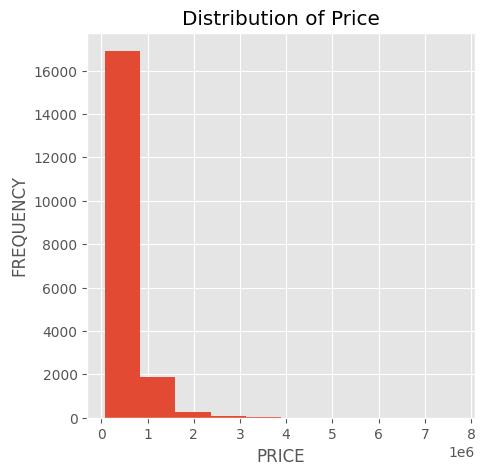

In [ ]:
# Extract the price Column
price = df['price']

# Price statistics
price_stats = price.describe()
print(price_stats)

# Histogram of the price statistics
plt.style.use('ggplot')
price.hist(figsize=(5,5))
plt.xlabel ('PRICE')
plt.ylabel('FREQUENCY')
plt.title ('Distribution of Price')

- The histogram shows that the distribution of the house prices in trhe dataset is right skewed, which means thet there are more houses with lower prices.
- The summary statistics provides insights on the mean price whish is at USD 541443 and the median price at USD 450000. The standard devistion is USD 370909.The high standard deviation implies that there are significant differences in housing prices across the dataset. Some houses may be priced much lower than the average, while others may be priced much higher. This variability can be influenced by various factors which will be analysed
.
- The maximum housing price recorded is $7,700,000. This represents the highest observed price in the dataset.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'zipcode'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>],
       [<Axes: title={'center': 'sqft_lot15'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

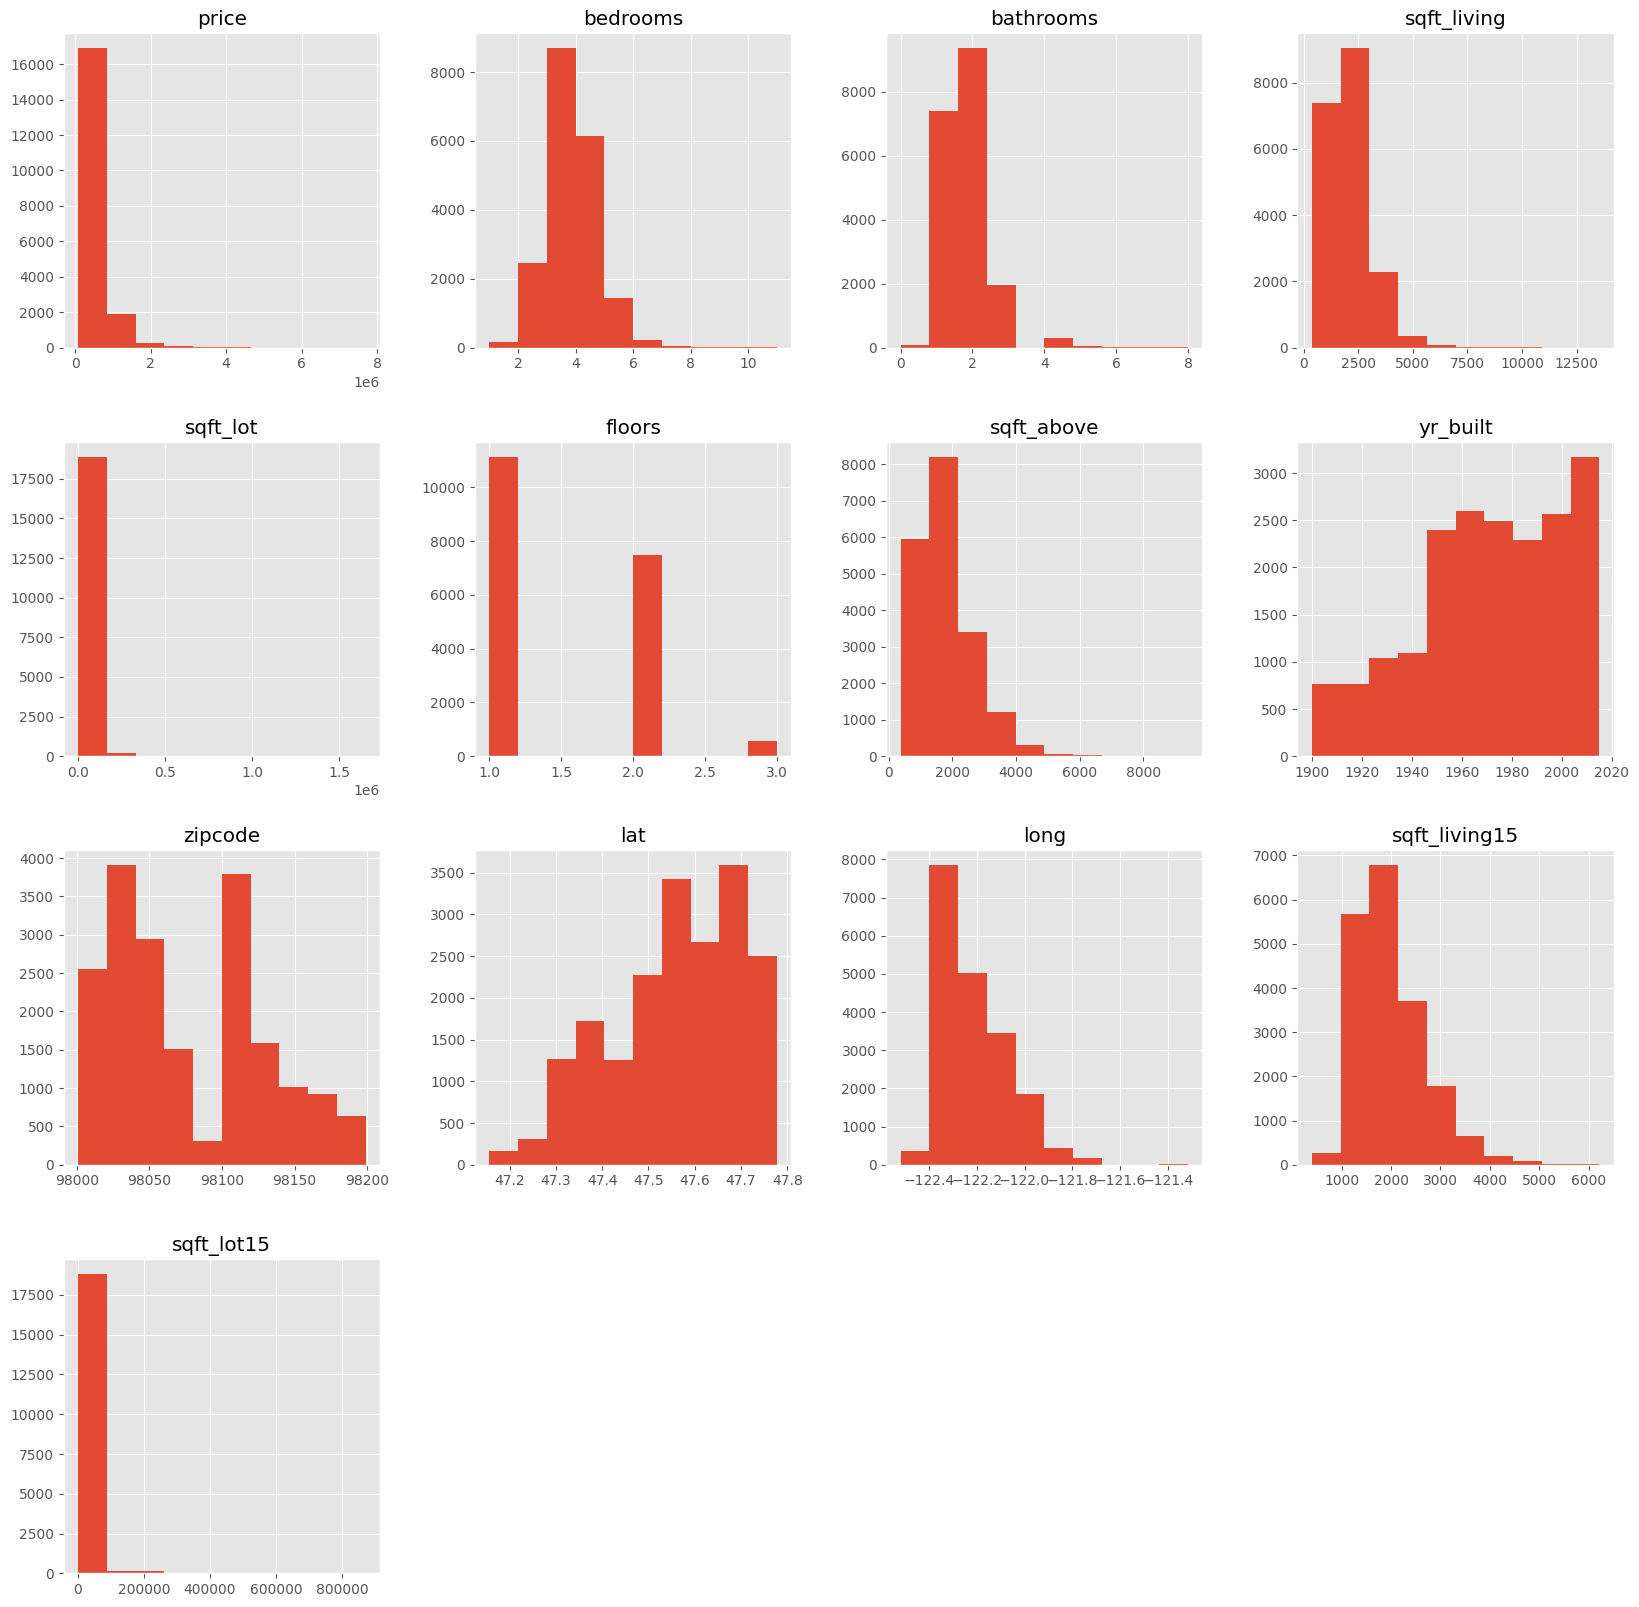

In [ ]:
#distribution of the other variables
df.hist(figsize=(20,20))

majority of the distributions are skewed

### Bivariate Analysis
In this section we will examine the relationships between our target variable-price and other attributes in the dataset. This will help us understand how one variable affects or is affected by the other varriables.

DESCRIPTIVE ANALYISIS

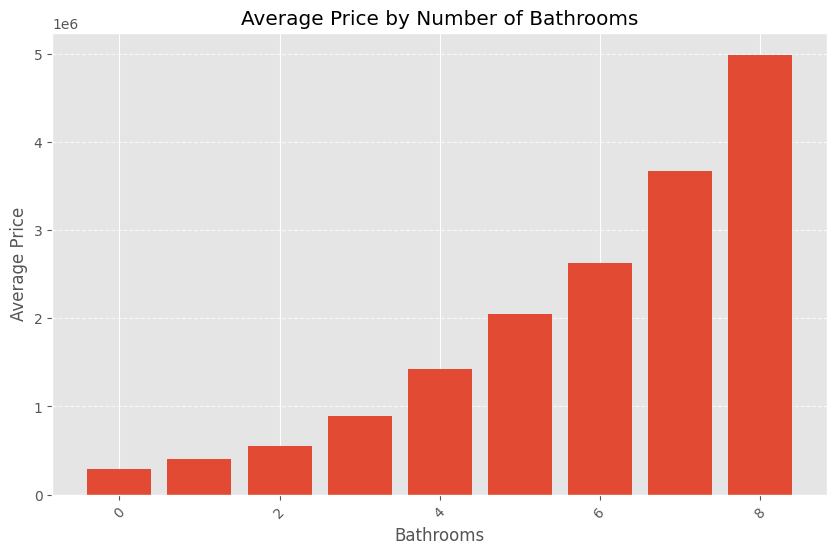

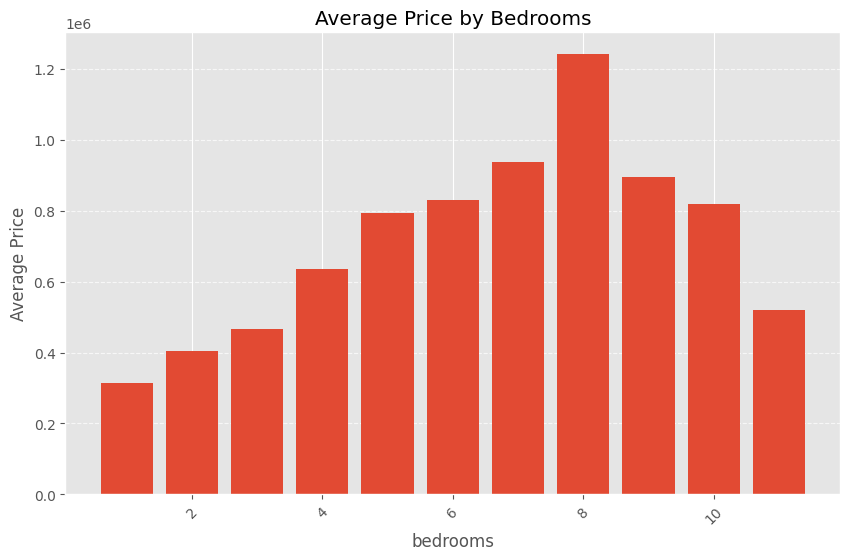

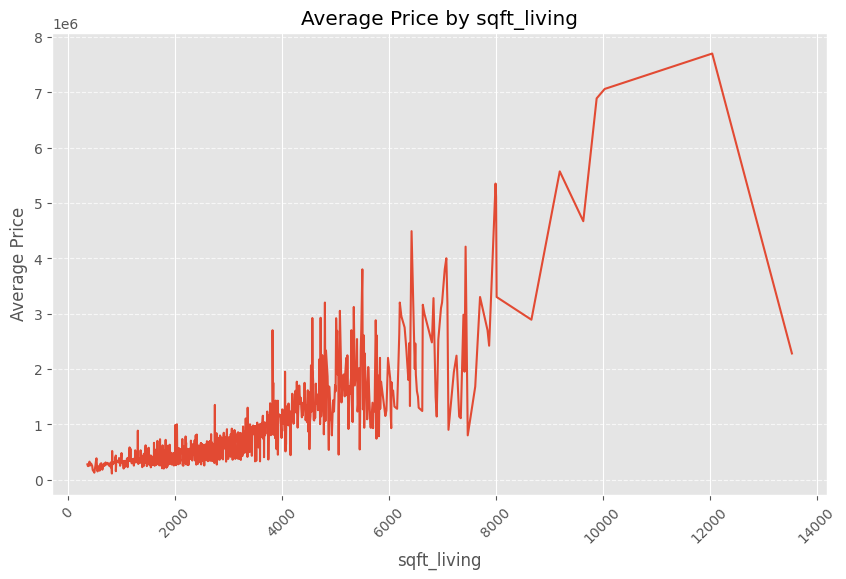

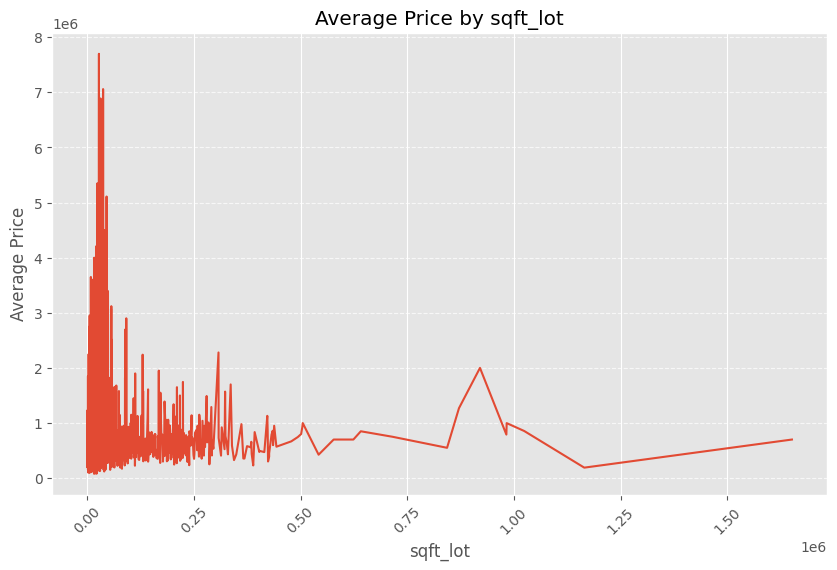

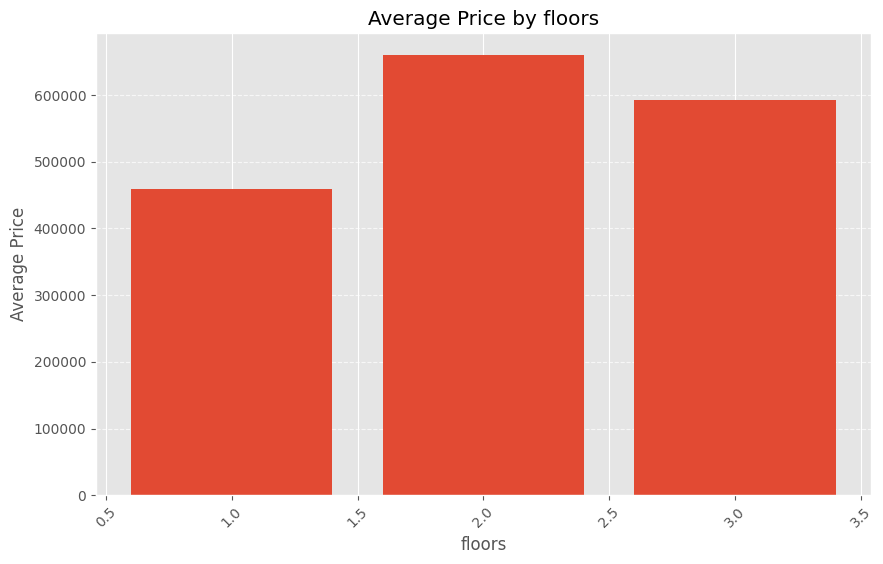

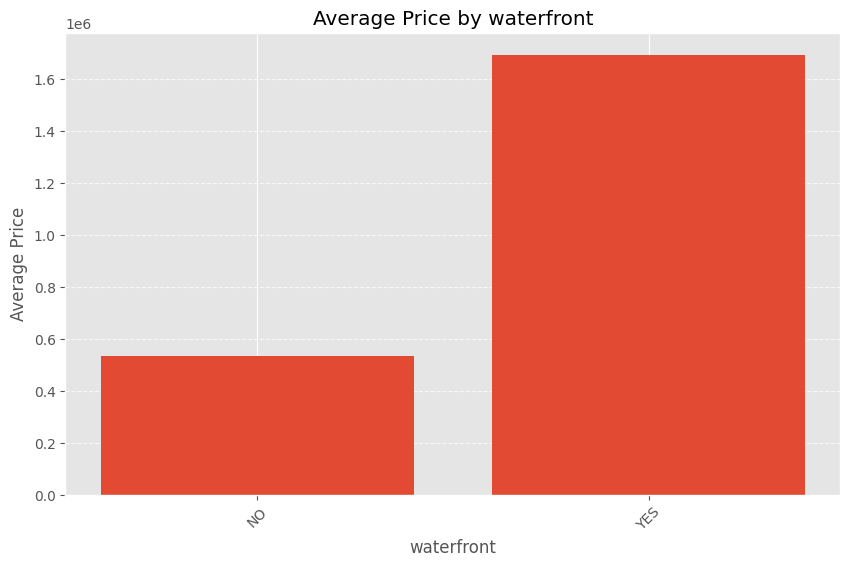

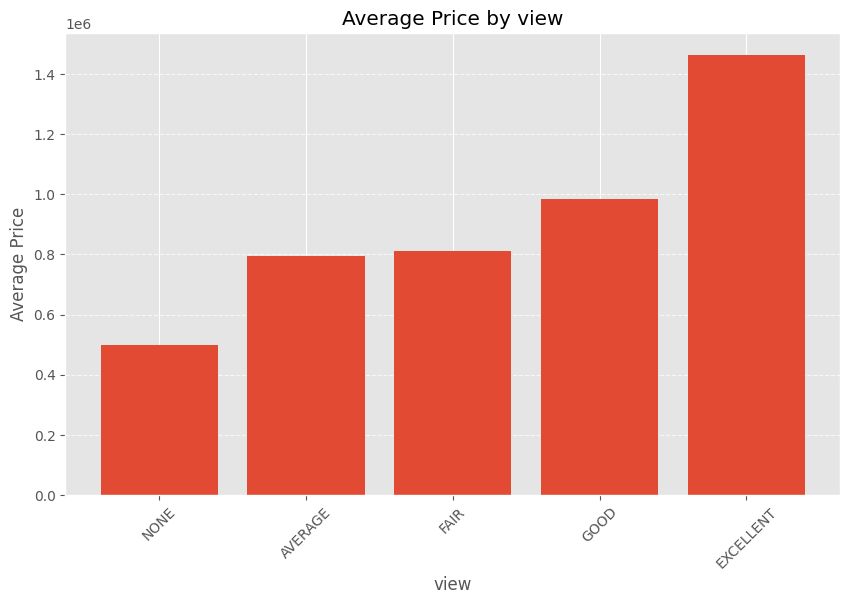

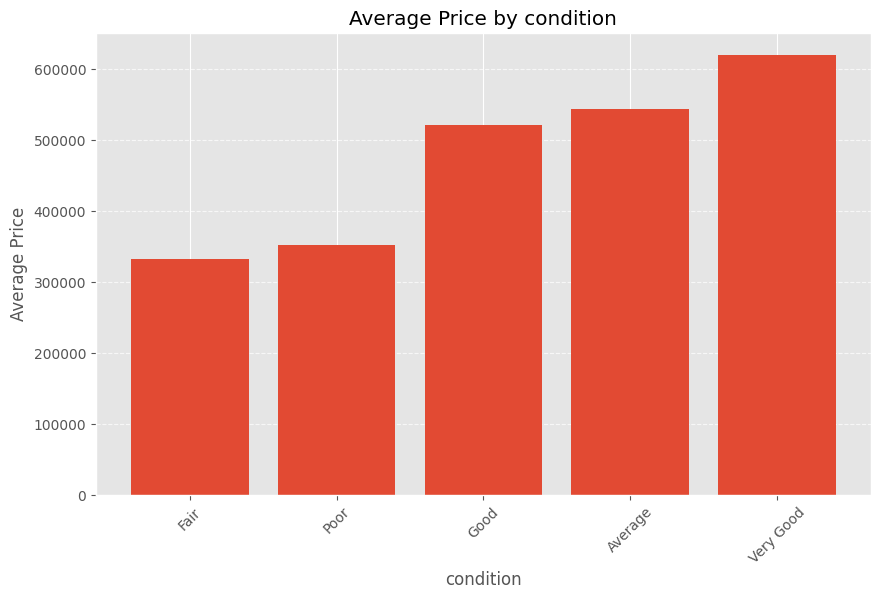

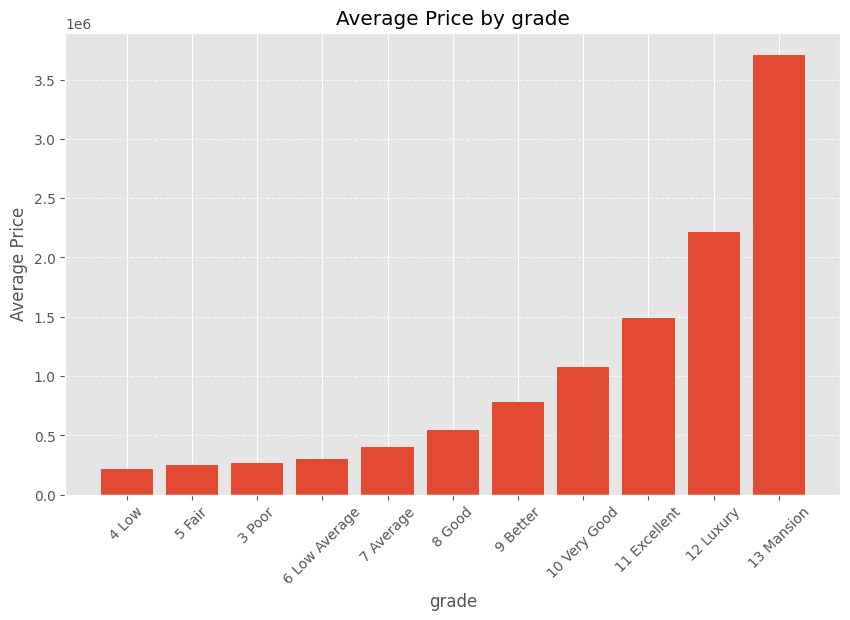

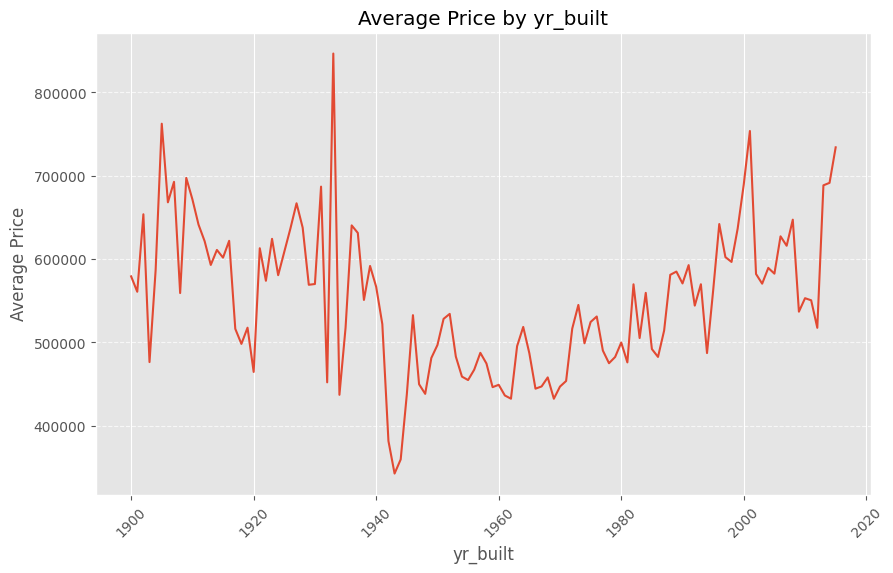

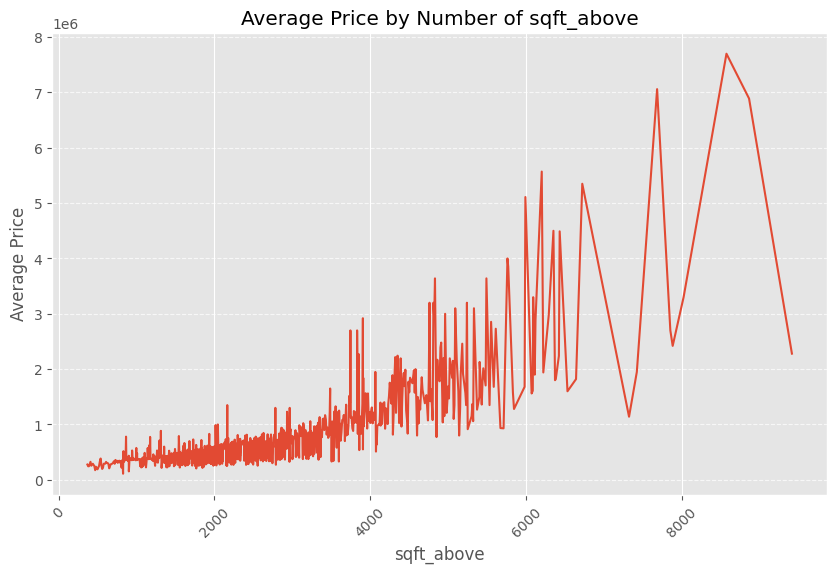

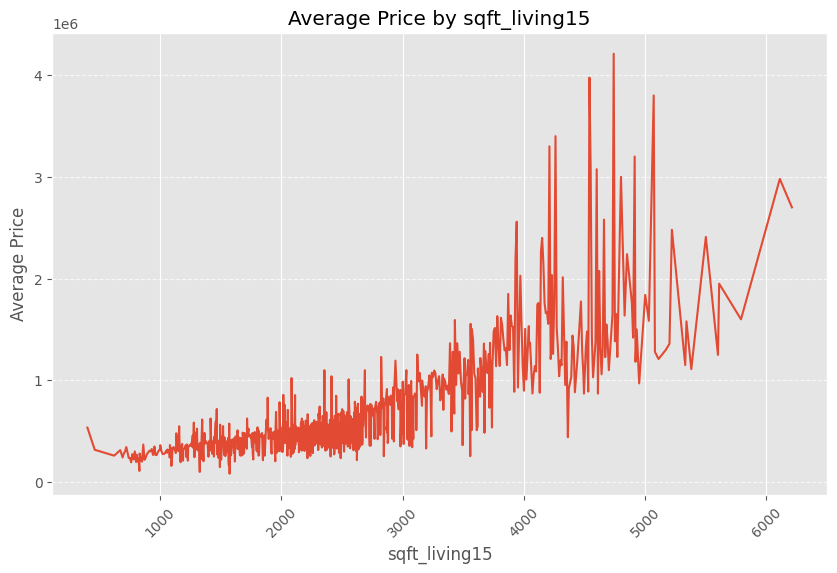

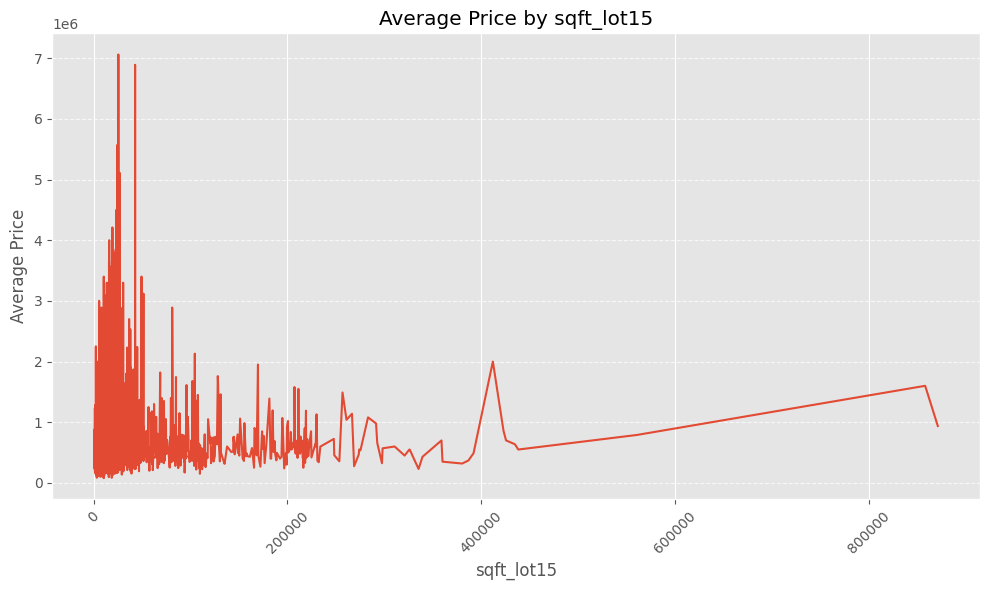

In [ ]:
# The relationship between number of bedrooms, bathrooms, sqft_living, sqft and price
average_price_by_bedrooms = df.groupby('bedrooms')['price'].mean()
avg_price_by_bathrooms = df.groupby('bathrooms')['price'].mean()
avg_price_by_sqft_living = df.groupby('sqft_living')['price'].mean()
avg_price_by_sqft_lot = df.groupby('sqft_lot')['price'].mean()
avg_price_by_floors = df.groupby('floors')['price'].mean()
avg_price_by_waterfront	 = df.groupby('waterfront')['price'].mean()
avg_price_by_view = df.groupby('view')['price'].mean().sort_values(ascending=True)
avg_price_by_condition = df.groupby('condition')['price'].mean().sort_values(ascending=True)
avg_price_by_grade = df.groupby('grade')['price'].mean().sort_values(ascending=True)
avg_price_by_sqft_above = df.groupby('sqft_above')['price'].mean()
avg_price_by_sqft_living15 = df.groupby('sqft_living15')['price'].mean()
avg_price_by_sqft_lot15 = df.groupby('sqft_lot15')['price'].mean()
avg_price_by_yr_built = df.groupby('yr_built')['price'].mean()

# Plotting the graph
# bathrooms
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_bathrooms.index, avg_price_by_bathrooms.values)
plt.xlabel('Bathrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bathrooms')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#bedrooms
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_bedrooms.index, average_price_by_bedrooms.values)
plt.xlabel('bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Bedrooms')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#sqft_living
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_sqft_living.index, avg_price_by_sqft_living.values)
plt.xlabel('sqft_living')
plt.ylabel('Average Price')
plt.title('Average Price by sqft_living')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#sqft_lot
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_sqft_lot.index, avg_price_by_sqft_lot.values)
plt.xlabel('sqft_lot')
plt.ylabel('Average Price')
plt.title('Average Price by sqft_lot')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#floors
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_floors.index, avg_price_by_floors.values)
plt.xlabel('floors')
plt.ylabel('Average Price')
plt.title('Average Price by floors')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#waterfront
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_waterfront.index, avg_price_by_waterfront.values)
plt.xlabel('waterfront')
plt.ylabel('Average Price')
plt.title('Average Price by waterfront')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#view
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_view.index, avg_price_by_view.values)
plt.xlabel('view')
plt.ylabel('Average Price')
plt.title('Average Price by view')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#condition
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_condition.index, avg_price_by_condition.values)
plt.xlabel('condition')
plt.ylabel('Average Price')
plt.title('Average Price by condition')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#grade
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_grade.index, avg_price_by_grade.values)
plt.xlabel('grade')
plt.ylabel('Average Price')
plt.title('Average Price by grade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#yr_built
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_yr_built.index, avg_price_by_yr_built.values)
plt.xlabel('yr_built')
plt.ylabel('Average Price')
plt.title('Average Price by yr_built')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#sqft_above
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_sqft_above.index, avg_price_by_sqft_above.values)
plt.xlabel('sqft_above')
plt.ylabel('Average Price')
plt.title('Average Price by Number of sqft_above')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#sqft_living15
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_sqft_living15.index, avg_price_by_sqft_living15.values)
plt.xlabel('sqft_living15')
plt.ylabel('Average Price')
plt.title('Average Price by sqft_living15')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

#sqft_lot15
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_sqft_lot15.index, avg_price_by_sqft_lot15.values)
plt.xlabel('sqft_lot15')
plt.ylabel('Average Price')
plt.title('Average Price by sqft_lot15')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better reference

plt.tight_layout()
plt.show()

**INSIGHTS FROM THIS DESCRIPTIVE ANALYSIS**

FROM VISUALIZATION OF THE GRAPHS ABOVE, IT IS APPARENT THAT THE AVERAGE PRICE OF THE HOUSES IS HIGHER:

1. WITH INCREASE IN THE NUMBER OF BATHROOMS
2. WITH PRESENCE OF THE WATERFRONT
3. WITH A BETTER VIEW
4. WITH IMPROVEMENT IN THE CONDITION ON THE HOUSE
5. WITH A HIGHER GRADE OF THE HOUSE
6. WITH MORE SQFT_LIVING
7. WITH MORE SQFT_ABOVE

THE AVERAGE PRICE OF HOUSES INCREASES UPTO 8 BEDROOMS, AFTER WHICH IT DECREASES.
FROM THE TIME SERIES, THE YEAR A HOUSE WAS BUILT DID NOT APPEAR TO HAVE AN INFLUENCE ON THE PRICE OF THE HOUSES.
ON AVERAGE HOUSES WITH 2 FLOORS HAVE A HIGHER PRICE THAN THOSE WITH 3 FLOORS, SO HAVING MORE FLOORS MAY NOT NECESSARILY TRANSLATE TO A HIGHER PRICE OF THE HOUSE.

# **USING TABLEAU WE'VE PLOTTED A HEAT MAP OF THE PRICES OF HOUSES USING THE LATITUDE, LONGITUDE AND ZIPCODES**

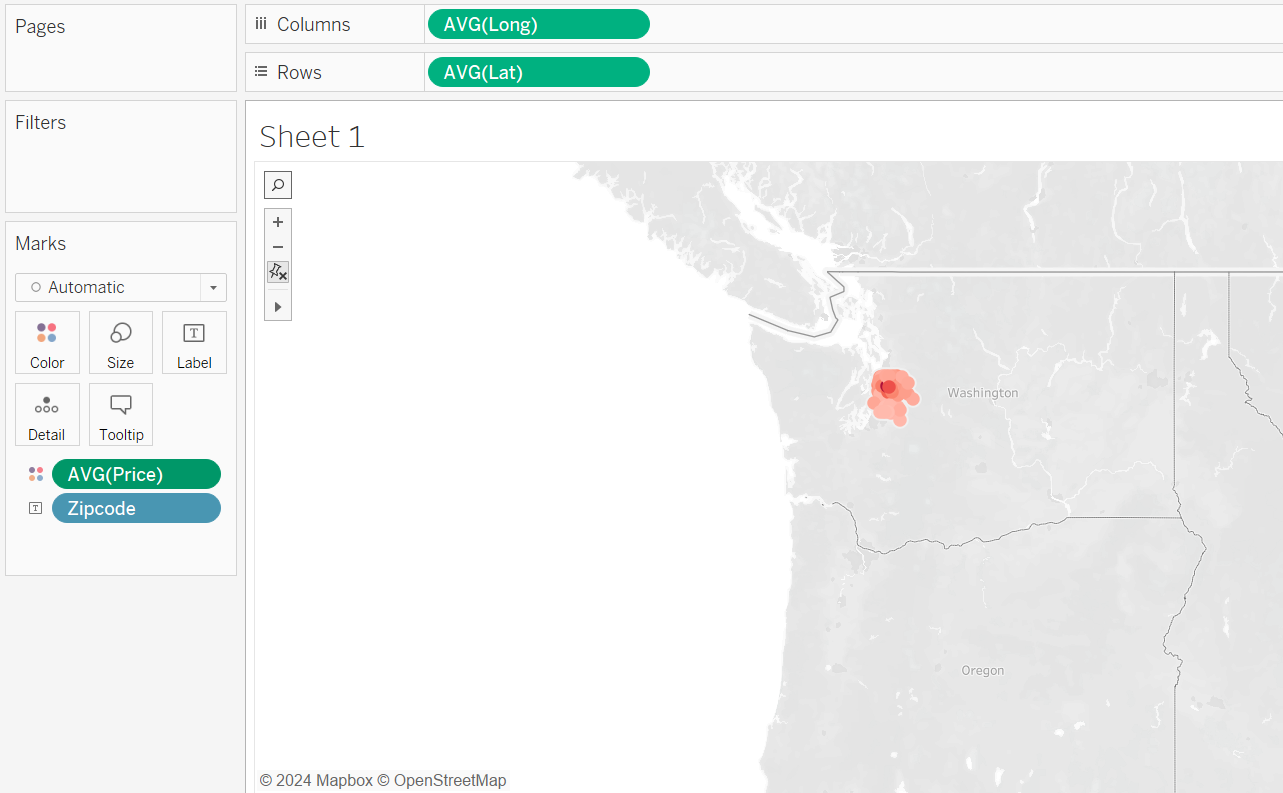

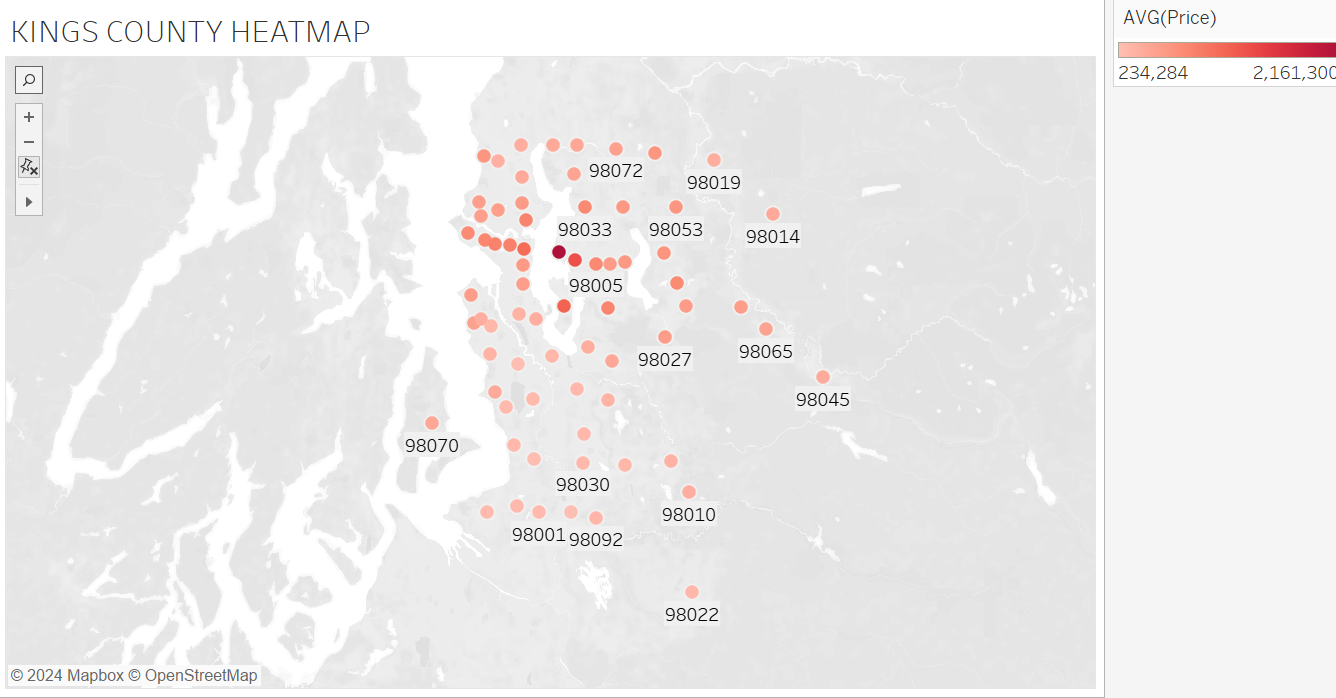

USING TABLEAU WE'VE PLOTTED A HEAT MAP OF THE PRICES OF HOUSES USING THE LATITUDE, LONGITUDE AND ZIPCODES


**INSIGHTS**

FROM THIS HEATMAP IS APPARENT THAT THE BEST PRICED HOUSES (DARKER SHADE OF RED) ARE IN THE CENTRAL REGION OF KINGS COUNTY.

Online research as to why this is the case revealed that: The central region of Kings County's allure stems from proximity to essential amenities like employment centers, schools, and recreational facilities, enhancing overall quality of life.

Historical significance and architectural charm add to its appeal, fostering a sense of community and cultural richness. Urban development initiatives, along with limited land availability, drive competition among buyers, resulting in escalating property values.

Prestigious perception and affluent resident demographics further elevate demand and prices.

These factors, alongside favorable market conditions and investor interest, consolidate the central region's status as a highly coveted residential destination within Kings County.

In [ ]:
# we can now drop longititude, latitude and zipcode columns
df = df.drop(columns=['long', 'lat', 'zipcode'])

# **INFERENTIAL STATISTICS**

WE'LL USE STATISTICAL TESTS TO CHECK IF THE DIFFERENCES SHOWN ABOVE ARE STATISTICALLY SIGNIFICANT

IN THIS CASE WE'RE USING MANN WHITNEY U AND KRUSKAL WALLIS TESTS RATHER THAN T-TESTS AND ANOVA BECAUSE MOST OF THE VARIABLES DO NOT SATISFY THE HOMOGENEITY OF VARIANCES ASSUMPTIONS OF T-TESTS AND ANOVA AND THE DISTRIBUTIONS ARE ALSO SKEWED

MANN WHITEY U AND KRUSKAL WALLIS ARE NON PARAMETRIC TESTS THAT DO NOT ASSUME NORMALITY OR EQUAL VARIANCES AND THEY ARE ALSO ROBUST AGAINST SKEWED DATA.

The post hoc pairwise comparisons, conducted after the Kruskal wallis statistical test has been performed to determine which groups differ from each other significantly. Therefore providing insights into the specific differences between groups that may not be apparent from the initial analysis. It is important to know which specific groups have a statistically significant difference



In [ ]:
from scipy import stats

# Variables to check
variables = ['bathrooms', 'waterfront', 'view', 'condition', 'grade', 'bedrooms', 'floors']

for var in variables:
    # Extract data for the variable
    groups = [df[df[var] == val]['price'] for val in df[var].unique()]

    # Normality test (Kolmogorov-Smirnov)
    normality_results = [stats.kstest(group, 'norm') for group in groups]
    p_values_normality = [result[1] for result in normality_results]

    # Homogeneity of Variance test (Levene's test)
    homogeneity_result = stats.levene(*groups)

    # Print results
    print(f"\n{var.capitalize()}:")
    print("Normality p-values:", p_values_normality)
    print("Homogeneity of Variance p-value:", homogeneity_result.pvalue)



Bathrooms:
Normality p-values: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Homogeneity of Variance p-value: 0.0

Waterfront:
Normality p-values: [0.0, 0.0]
Homogeneity of Variance p-value: 1.3817112564111914e-144

View:
Normality p-values: [0.0, 0.0, 0.0, 0.0, 0.0]
Homogeneity of Variance p-value: 1.0125963924207291e-288

Condition:
Normality p-values: [0.0, 0.0, 0.0, 0.0, 0.0]
Homogeneity of Variance p-value: 4.880995092583118e-11

Grade:
Normality p-values: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Homogeneity of Variance p-value: 0.0

Bedrooms:
Normality p-values: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Homogeneity of Variance p-value: 2.0204244112631658e-217

Floors:
Normality p-values: [0.0, 0.0, 0.0]
Homogeneity of Variance p-value: 2.154129038756904e-108


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

#checking skewness and Kurtosis of all numerical variables

# Calculate skewness, kurtosis, variance, and standard deviation for each variable
summary_stats = pd.DataFrame({
    'Skewness': num_attributes.apply(skew),
    'Kurtosis': num_attributes.apply(kurtosis),
    'Variance': num_attributes.var(),
    'Std Deviation': num_attributes.std()
})

# Display the summary statistics table
print(summary_stats)

               Skewness  Kurtosis        Variance  Std Deviation
price              4.08     35.29 137574177905.13      370909.93
bedrooms           0.55      1.89            0.82           0.90
bathrooms          0.91      2.04            0.54           0.73
sqft_living        1.50      5.55       849966.43         921.94
sqft_lot          13.26    301.50   1662450593.47       40773.16
floors             0.72     -0.56            0.30           0.55
sqft_above         1.46      3.50       691858.07         831.78
yr_built          -0.47     -0.66          863.67          29.39
zipcode            0.41     -0.85         2856.88          53.45
lat               -0.49     -0.68            0.02           0.14
long               0.88      1.05            0.02           0.14
sqft_living15      1.12      1.67       468935.20         684.79
sqft_lot15         9.76    159.11    759183840.08       27553.29


In [ ]:
from scipy import stats

from scipy import stats

# Assuming you have a DataFrame 'df' with a column 'price' and a column 'waterfront' indicating whether a property has waterfront or not.

# Separate the data into two groups: with waterfront and without waterfront
waterfront_group = df[df['waterfront'] == 'YES']['price']
non_waterfront_group = df[df['waterfront'] == 'NO']['price']

# Perform Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(waterfront_group, non_waterfront_group, alternative='two-sided')

# Print the results
print("Mann-Whitney U statistic:", u_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The difference in average price between the group with a waterfront and the group without a waterfront is statistically significant.")
else:
    print("There is no statistically significant difference in average price between the group with a waterfront and the group without a waterfront.")

Mann-Whitney U statistic: 2455123.5
p-value: 3.7024964710112914e-59
The difference in average price between the group with a waterfront and the group without a waterfront is statistically significant.


In [ ]:
from scipy import stats

# Create lists to hold prices for each group of bathrooms
bathroom_groups = []
for bathrooms in df['bathrooms'].unique():
    bathroom_groups.append(df[df['bathrooms'] == bathrooms]['price'])

# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*bathroom_groups)

# Print the results
print("Kruskal-Wallis H statistic:", h_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The difference in average price between groups with different numbers of bathrooms is statistically significant.")
else:
    print("There is no statistically significant difference in average price between groups with different numbers of bathrooms.")

# Post-hoc analysis (Conover-Iman test)
posthoc = sm.stats.multicomp.pairwise_tukeyhsd(df['price'], df['bathrooms'])
print("\nPost-Hoc Analysis (Conover-Iman Test):")
print(posthoc)

Kruskal-Wallis H statistic: 4216.355571576836
p-value: 0.0
The difference in average price between groups with different numbers of bathrooms is statistically significant.

Post-Hoc Analysis (Conover-Iman Test):
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
     0      1   108333.045 0.0852   -6954.2372  223620.3272  False
     0      2  255962.6379    0.0   140786.984  371138.2918   True
     0      3  597449.7969    0.0  480702.8495  714196.7444   True
     0      4 1136736.9338    0.0 1009702.5683 1263771.2993   True
     0      5 1758899.2287    0.0 1570936.9435 1946861.5139   True
     0      6  2339826.058    0.0 2017288.8309  2662363.285   True
     0      7  3380826.058    0.0 2697102.6026 4064549.5133   True
     0      8  4700826.058    0.0 4017102.6026 5384549.5133   True
     1      2  147629.5929    0.0  132803.4917  162

In [ ]:
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [ ]:
from scipy import stats

# Create lists to hold prices for each view group
view_groups = []
for view_quality in ['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR']:
    view_groups.append(df[df['view'] == view_quality]['price'])

# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*view_groups)

# Print the results
print("Kruskal-Wallis H statistic:", h_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The difference in average price between groups with different views is statistically significant.")
else:
    print("There is no statistically significant difference in average price between groups with different views.")

# Post-hoc analysis (Conover-Iman test)
posthoc = sm.stats.multicomp.pairwise_tukeyhsd(df['price'], df['view'])
print("\nPost-Hoc Analysis (Conover-Iman Test):")
print(posthoc)

Kruskal-Wallis H statistic: 1708.5494629568025
p-value: 0.0
The difference in average price between groups with different views is statistically significant.

Post-Hoc Analysis (Conover-Iman Test):
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1    group2    meandiff   p-adj      lower        upper     reject
-------------------------------------------------------------------------
  AVERAGE EXCELLENT  667531.7573    0.0   604561.4078  730502.1069   True
  AVERAGE      FAIR   17590.4374 0.9411   -45299.5303    80480.405  False
  AVERAGE      GOOD  188253.5171    0.0   133628.1895  242878.8447   True
  AVERAGE      NONE  -296755.832    0.0  -329475.3765 -264036.2875   True
EXCELLENT      FAIR   -649941.32    0.0   -726608.876  -573273.764   True
EXCELLENT      GOOD -479278.2402    0.0  -549326.0277 -409230.4528   True
EXCELLENT      NONE -964287.5893    0.0 -1018998.9657 -909576.2129   True
     FAIR      GOOD  170663.0797    0.0   100687.5438  240638.

In [ ]:
from scipy import stats

# Create lists to hold prices for each condition group
condition_groups = []
for condition in df['condition'].unique():
    condition_groups.append(df[df['condition'] == condition]['price'])

# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*condition_groups)

# Print the results
print("Kruskal-Wallis H statistic:", h_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The difference in average price between groups with different conditions is statistically significant.")
else:
    print("There is no statistically significant difference in average price between groups with different conditions.")

# Post-hoc analysis (Conover-Iman test)
posthoc = sm.stats.multicomp.pairwise_tukeyhsd(df['price'], df['condition'])
print("\nPost-Hoc Analysis (Conover-Iman Test):")
print(posthoc)

Kruskal-Wallis H statistic: 230.73692688865907
p-value: 9.16111300461158e-49
The difference in average price between groups with different conditions is statistically significant.

Post-Hoc Analysis (Conover-Iman Test):
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1   group2    meandiff   p-adj     lower        upper     reject
----------------------------------------------------------------------
Average      Fair -210573.2017    0.0 -292859.1084 -128287.2951   True
Average      Good  -22144.8399 0.0031  -38980.8491   -5308.8307   True
Average      Poor -190679.8004 0.0747 -392551.5305   11191.9297  False
Average Very Good   76123.8004    0.0   48628.3888  103619.2119   True
   Fair      Good  188428.3618    0.0  105416.8217   271439.902   True
   Fair      Poor   19893.4013 0.9991 -197729.3457  237516.1483  False
   Fair Very Good  286697.0021    0.0  200886.3836  372507.6206   True
   Good      Poor -168534.9605 0.1533 -370703.5554   33633.6344  False

In [ ]:
from scipy import stats

# Create lists to hold prices for each grade group
grade_groups = []
for grade in df['grade'].unique():
    grade_groups.append(df[df['grade'] == grade]['price'])

# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*grade_groups)

# Print the results
print("Kruskal-Wallis H statistic:", h_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The difference in average price between groups with different grades is statistically significant.")
else:
    print("There is no statistically significant difference in average price between groups with different grades.")


# Post-hoc analysis (Conover-Iman test)
posthoc = sm.stats.multicomp.pairwise_tukeyhsd(df['price'], df['grade'])
print("\nPost-Hoc Analysis (Conover-Iman Test):")
print(posthoc)

Kruskal-Wallis H statistic: 8614.71244249437
p-value: 0.0
The difference in average price between groups with different grades is statistically significant.

Post-Hoc Analysis (Conover-Iman Test):
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
    group1        group2       meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------
 10 Very Good  11 Excellent   407215.3626    0.0   356298.1242   458132.6009   True
 10 Very Good     12 Luxury  1132422.5904    0.0  1036990.5727   1227854.608   True
 10 Very Good    13 Mansion   2631772.068    0.0  2401074.4549  2862469.6812   True
 10 Very Good        3 Poor  -816997.1627 0.0562 -1643915.4125      9921.087  False
 10 Very Good         4 Low  -865195.1627    0.0 -1032522.6637  -697867.6617   True
 10 Very Good        5 Fair  -828488.9599    0.0  -890906.5304  -766071.3894   True
 10 Very Good 6 Low Average  -777175.4637    0.

In [ ]:
from scipy import stats


# Create lists to hold prices for each bedroom group
bedroom_groups = []
for bedrooms in df['bedrooms'].unique():
    bedroom_groups.append(df[df['bedrooms'] == bedrooms]['price'])

# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*bedroom_groups)

# Print the results
print("Kruskal-Wallis H statistic:", h_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The difference in average price between groups with different numbers of bedrooms is statistically significant.")
else:
    print("There is no statistically significant difference in average price between groups with different numbers of bedrooms.")

# Post-hoc analysis (Conover-Iman test)
posthoc = sm.stats.multicomp.pairwise_tukeyhsd(df['price'], df['bedrooms'])
print("\nPost-Hoc Analysis (Conover-Iman Test):")
print(posthoc)

Kruskal-Wallis H statistic: 2346.9091736424602
p-value: 0.0
The difference in average price between groups with different numbers of bedrooms is statistically significant.


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,



Post-Hoc Analysis (Conover-Iman Test):
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj      lower        upper     reject
-------------------------------------------------------------------
     1      2   89005.2858 0.0461      735.0372  177275.5344   True
     1      3   151176.253    0.0    65049.5041   237303.002   True
     1      4  322890.9542    0.0   236410.4076  409371.5007   True
     1      5  479442.0777    0.0   389126.3885  569757.7669   True
     1      6   516906.181    0.0   403209.4959   630602.866   True
     1      7  623469.4343    0.0   414595.2865  832343.5821   True
     1      8  926965.0525    0.0   576318.8052 1277611.2997   True
     1      9  579783.0676 0.0033   111430.6914 1048135.4438   True
     1     10  505783.2343  0.317  -151055.0221 1162621.4907  False
     1     11  205783.2343    1.0  -925484.4979 1337050.9665  False
     2      3   62170.9672    0.0    36351.3917   87990.5428   True
     2  

In [ ]:
from scipy import stats
import pandas as pd
from scipy.stats import kruskal


# Assuming you have a DataFrame 'df' with a column 'price' and a column 'floors' indicating the number of floors.

# Create lists to hold prices for each floor group
floor_groups = []
for floors in df['floors'].unique():
    floor_groups.append(df[df['floors'] == floors]['price'])

# Perform Kruskal-Wallis test
h_statistic, p_value = stats.kruskal(*floor_groups)

# Print the results
print("Kruskal-Wallis H statistic:", h_statistic)
print("p-value:", p_value)

# Check if the difference is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The difference in average price between groups with different numbers of floors is statistically significant.")
else:
    print("There is no statistically significant difference in average price between groups with different numbers of floors.")

# Post-hoc analysis (Conover-Iman test)
posthoc = sm.stats.multicomp.pairwise_tukeyhsd(df['price'], df['floors'])
print("\nPost-Hoc Analysis (Conover-Iman Test):")
print(posthoc)

Kruskal-Wallis H statistic: 1745.0997758271121
p-value: 0.0
The difference in average price between groups with different numbers of floors is statistically significant.

Post-Hoc Analysis (Conover-Iman Test):
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     1      2 199934.2139    0.0  187385.9523 212482.4755   True
     1      3 132297.0776    0.0   95705.2655 168888.8897   True
     2      3 -67637.1363 0.0001 -104650.2224 -30624.0502   True
----------------------------------------------------------------


**CORRELATION AND MULTICOLLINEARLITY ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19163 entries, 1 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19163 non-null  float64
 1   bedrooms       19163 non-null  int64  
 2   bathrooms      19163 non-null  int64  
 3   sqft_living    19163 non-null  int64  
 4   sqft_lot       19163 non-null  int64  
 5   floors         19163 non-null  int64  
 6   waterfront     19163 non-null  object 
 7   view           19163 non-null  object 
 8   condition      19163 non-null  object 
 9   grade          19163 non-null  object 
 10  sqft_above     19163 non-null  int64  
 11  yr_built       19163 non-null  int64  
 12  sqft_living15  19163 non-null  int64  
 13  sqft_lot15     19163 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 2.2+ MB


In [ ]:
continuous_variables = df[['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']]
continuous_variables.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
1,538000.00,2570,7242,2170,1690,7639
2,180000.00,770,10000,770,2720,8062
3,604000.00,1960,5000,1050,1360,5000
4,510000.00,1680,8080,1680,1800,7503
5,1230000.00,5420,101930,3890,4760,101930


In [ ]:
categorical_variables = df[['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade']]
categorical_variables.tail()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
21591,3,2,2,NO,NONE,Average,8 Good
21592,3,2,3,NO,NONE,Average,8 Good
21593,4,2,2,NO,NONE,Average,8 Good
21594,2,0,2,NO,NONE,Average,7 Average
21596,2,0,2,NO,NONE,Average,7 Average


**CORRELATION IS ONLY USED FOR CONTINUOUS VARIABLES**

In [ ]:
correlation = continuous_variables.corr()['price']
print(correlation)

price           1.00
sqft_living     0.70
sqft_lot        0.09
sqft_above      0.61
sqft_living15   0.58
sqft_lot15      0.08
Name: price, dtype: float64


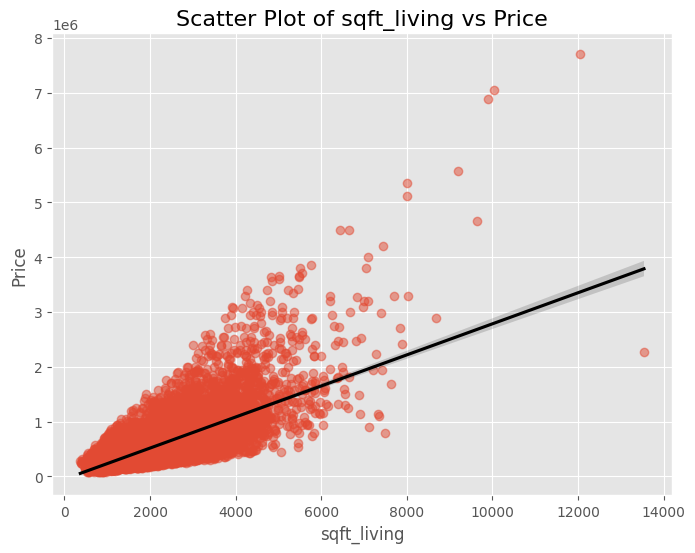

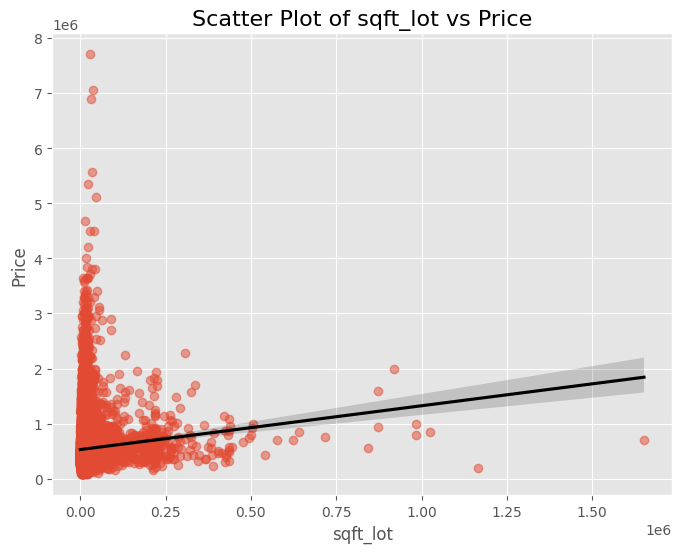

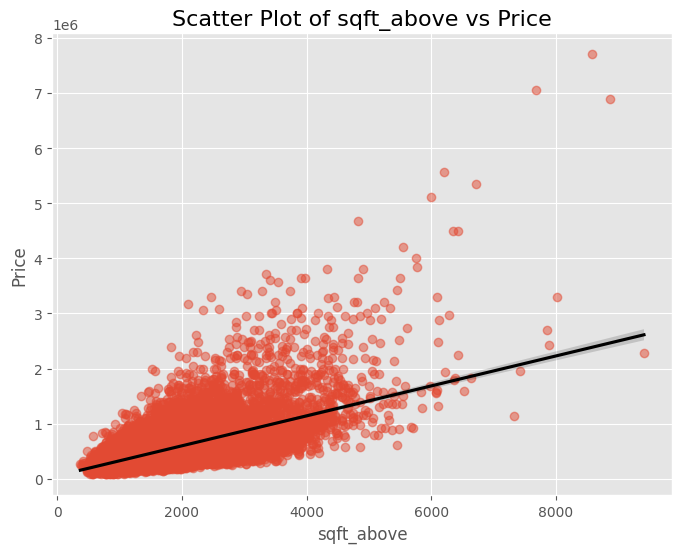

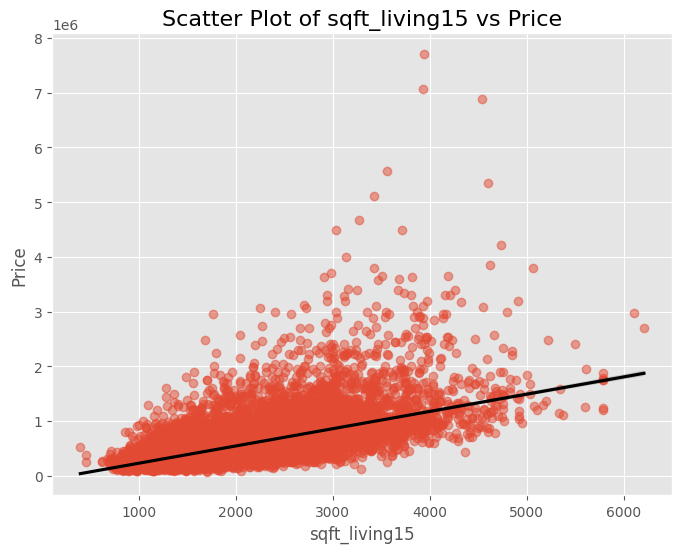

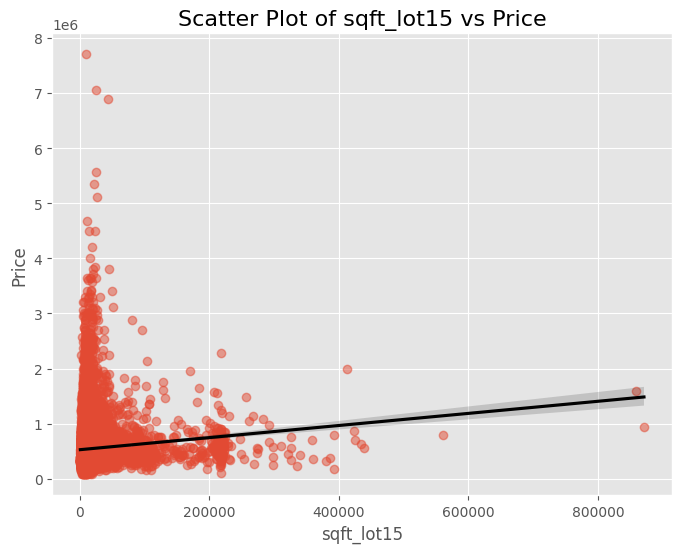

In [ ]:
# Create scatter plots with black regression lines for each continuous variable against price
for column in continuous_variables.columns[1:]:  # Exclude 'price' column
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y='price', data=continuous_variables, scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
    plt.title(f'Scatter Plot of {column} vs Price', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(True)
    plt.show()

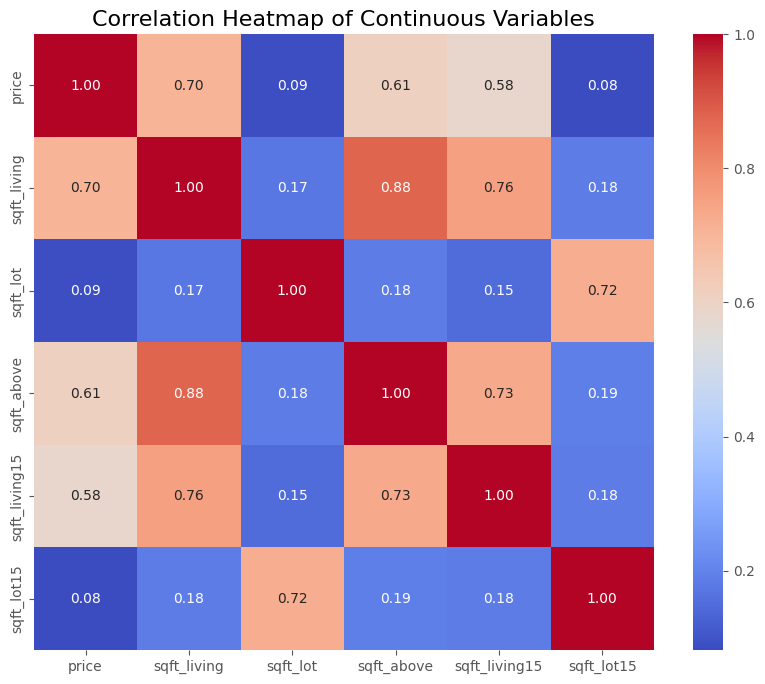

In [ ]:
# Calculate the correlation matrix
correlation_matrix = continuous_variables.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Continuous Variables', fontsize=16)
plt.show()

INSIGHTS FROM THIS ANALYSIS

THERE'S A RELATIVELY STRONG POSITIVE LINEAR CORRELATION BETWEEN PRICE AND SQFT_LIVING, SQFT_ABOVE AND SQFT_LIVING

THE CORRELATION HEATMAP INDICATES THAT THERE'S A NOTABLE LEVEL OF MULTICOLLINEARLITY BETWEEN sqft_living & sqft_living15, sqft_living & sqft_above, sqft_lot & sqft_lot15

# **REGRESSION ANALYSIS**

#### Encoding Categorical Variables

Before performing any regression we need to encode the categorical variables.

In [ ]:
label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])
df['grade'].value_counts()

grade
8     7948
9     5398
10    2311
7     1804
0     1014
1      356
6      212
2       81
5       25
3       13
4        1
Name: count, dtype: int64

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
1,538000.00,3,2,2570,7242,2,NO,NONE,Average,8,2170,1951,1690,7639
2,180000.00,2,1,770,10000,1,NO,NONE,Average,7,770,1933,2720,8062
3,604000.00,4,3,1960,5000,1,NO,NONE,Very Good,8,1050,1965,1360,5000
4,510000.00,3,2,1680,8080,1,NO,NONE,Average,9,1680,1987,1800,7503
5,1230000.00,4,4,5420,101930,1,NO,NONE,Average,1,3890,2001,4760,101930


In [ ]:
#View Column encoding
df['view'].replace(to_replace= ['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'], value = [0,1,2,3,4,], inplace= True )

In [ ]:
#Waterfront Column encoding
df['waterfront'].replace(to_replace= ['NO','YES'], value = [0,1], inplace= True )

In [ ]:
#Condition Column encoding
df['condition'].replace(to_replace= ['Poor','Fair','Average','Good','Very Good'], value = [0,1,2,3,4,], inplace= True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19163 entries, 1 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19163 non-null  float64
 1   bedrooms       19163 non-null  int64  
 2   bathrooms      19163 non-null  int64  
 3   sqft_living    19163 non-null  int64  
 4   sqft_lot       19163 non-null  int64  
 5   floors         19163 non-null  int64  
 6   waterfront     19163 non-null  int64  
 7   view           19163 non-null  int64  
 8   condition      19163 non-null  int64  
 9   grade          19163 non-null  int64  
 10  sqft_above     19163 non-null  int64  
 11  yr_built       19163 non-null  int64  
 12  sqft_living15  19163 non-null  int64  
 13  sqft_lot15     19163 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.2 MB


In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
1,538000.00,3,2,2570,7242,2,0,0,2,8,2170,1951,1690,7639
2,180000.00,2,1,770,10000,1,0,0,2,7,770,1933,2720,8062
3,604000.00,4,3,1960,5000,1,0,0,4,8,1050,1965,1360,5000
4,510000.00,3,2,1680,8080,1,0,0,2,9,1680,1987,1800,7503
5,1230000.00,4,4,5420,101930,1,0,0,2,1,3890,2001,4760,101930


**ONE HOT ENCODING OF CATEGORICAL VARIABLES, FEATURE SELECTION, CONCATENATION, and SPLITTING THE DATA INTO TRAINING AND TESTING DATA SETS**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# List of categorical variables to be one-hot encoded
categorical_vars = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

# One-hot encode categorical variables
encoded_categorical = pd.get_dummies(df[categorical_vars], drop_first=True)

# Select continuous variables. sqft_above, sqft_living15 and sqft_lot15 have not been selected due to the multicollinearlity observed prior
continuous_variables = df[['sqft_living', 'sqft_lot']]

# Concatenate one-hot encoded categorical variables with continuous variables
X = pd.concat([encoded_categorical, continuous_variables], axis=1)

# Define the dependent variable
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the predictor variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     2384.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:45:06   Log-Likelihood:            -2.1134e+05
No. Observations:               15330   AIC:                         4.227e+05
Df Residuals:                   15320   BIC:                         4.228e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.449e+05   1.38e+04     10.487      

**EVALUATE THE ASSUMPTIONS OF LINEAR REGRESSION**

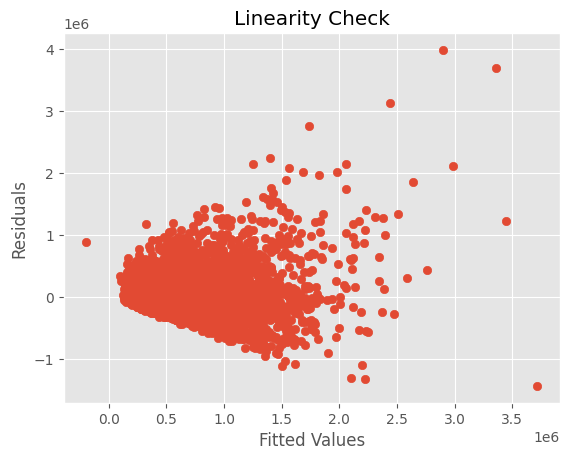

Rainbow Test p-value: 0.996901111516357
Durbin-Watson test statistic: 2.013617363633504


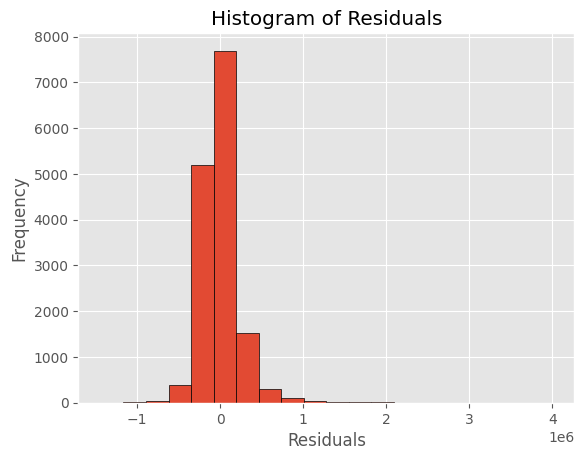

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test p-value: 0.0


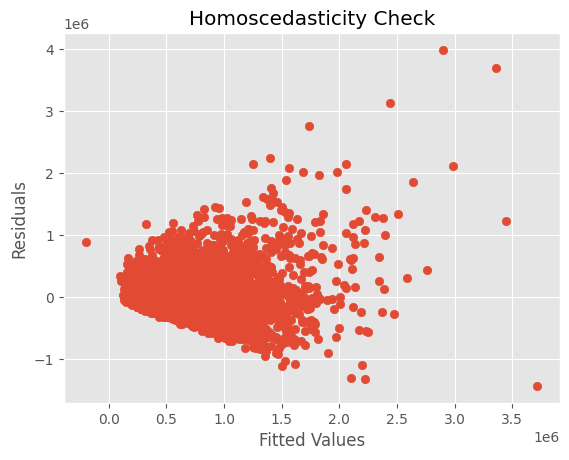

Breusch-Pagan Test p-value: 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from scipy.stats import shapiro

# Our model is a fitted linear regression model

# Residuals
residuals = model.resid

# Linearity
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

# Rainbow test for linearity
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow Test p-value:", rainbow_p_value)

# Independence
dw_test_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson test statistic:", dw_test_statistic)

# Normality
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

shapiro_statistic, shapiro_p_value = shapiro(residuals)
print("Shapiro-Wilk Test p-value:", shapiro_p_value)

# Homoscedasticity
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

bp_test_statistic, bp_p_value, _, _ = het_breuschpagan(residuals, model.model.exog)
print("Breusch-Pagan Test p-value:", bp_p_value)


# INTERPRETATION

Based on these results:

The relationship between the independent variables and the dependent variable appears to be linear.

There is no significant autocorrelation in the residuals.
The residuals are not normally distributed.

There is evidence of heteroscedasticity in the residuals.

Course of action:

 Linear regression is relatively robust to violations of normality assumptions and heteroscedasticity, especially with large sample sizes which we have in this case. Linear regression coefficient estimates are also usually still unbiased in the presence of heteroscedasticity. So we'll still proceed with linear regression

# Simple Linear Regression Model

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# Select feature and target variable
feature = 'sqft_living'
target = 'price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[[feature]], df[target], test_size=0.2, random_state=42)

# Add a constant term to the predictor variable
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the simple linear regression model
model_simple = sm.OLS(y_train, X_train).fit()

# Print model summary
print("Simple Linear Regression Model Summary:")
print(model_simple.summary())

Simple Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.470e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:45:39   Log-Likelihood:            -2.1290e+05
No. Observations:               15330   AIC:                         4.258e+05
Df Residuals:                   15328   BIC:                         4.258e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

In this model, R-squared is 0.490, indicating that approximately 49% of the variance in house prices can be explained by the square footage of living space.

The adjusted R-squared takes into account the number of predictors in the model. It penalizes the addition of unnecessary predictors. In this model, the adjusted R-squared is 0.489.

The F-statistic tests the overall significance of the regression model. A higher F-statistic and a lower p-value indicate a better fit of the model to the data. Here, the F-statistic is 1.470e+04 with a p-value close to 0, suggesting that the model is statistically significant.

Coefficients: The coefficient of sqft_living is 277.5570. This indicates that, on average, for each additional square foot of living space, the house price increases by $277.5570.

# Multiple Linear Regression Model with Two Features


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# Select features and target variable
features = ['sqft_living', 'bedrooms']
target = 'price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Add a constant term to the predictor variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the multiple linear regression model
model_2 = sm.OLS(y_train, X_train).fit()

# Print model summary
print("Multiple Linear Regression Model with Two Features Summary:")
print(model_2.summary())


Multiple Linear Regression Model with Two Features Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7886.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:48:27   Log-Likelihood:            -2.1263e+05
No. Observations:               15330   AIC:                         4.253e+05
Df Residuals:                   15327   BIC:                         4.253e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In this model, R-squared is 0.507, indicating that approximately 51% of the variance in house prices can be explained by square footage of living space and the number of bedrooms.

Here, the F-statistic is 7886 with a p-value close to 0, suggesting that the model is statistically significant.

The coefficient of sqft_living is 316.4133. This indicates that, on average, for each additional square foot of living space, the house price increases by $316.4133, holding the number of bedrooms constant.

# Multiple Linear Regression Model with Many Features

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# Select all available features and target variable
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
target = 'price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Add a constant term to the predictor variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the multiple linear regression model
model_all_features = sm.OLS(y_train, X_train).fit()

# Print model summary
print("Multiple Linear Regression Model with All Features Summary:")
print(model_all_features.summary())

Multiple Linear Regression Model with All Features Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     2660.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:48:31   Log-Likelihood:            -2.1138e+05
No. Observations:               15330   AIC:                         4.228e+05
Df Residuals:                   15321   BIC:                         4.228e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In this model, R-squared is 0.581, indicating that approximately 58.1% of the variance in house prices can be explained by these features.

Here, the F-statistic is 2660 with a p-value close to 0, suggesting that the model is statistically significant.


- **Intercept (const)**: The intercept term represents the estimated house price when all other predictor variables are zero. However, this interpretation is not meaningful in practice, as having zero square footage, bedrooms, bathrooms, etc., is unrealistic.

- **sqft_living**: The coefficient of sqft_living is 248.2605. This means that for every additional square foot of living space, holding all other variables constant, the house price is expected to increase by $248.2605.

- **bedrooms**: The coefficient of bedrooms is -48,620. This indicates that for each additional bedroom, holding all other variables constant, the house price is expected to decrease by $48,620. This negative coefficient suggests that, on average, houses with more bedrooms tend to have lower prices, which could be due to factors like smaller lot sizes or less desirable locations.

- **bathrooms**: The coefficient of bathrooms is 38,590. This means that for each additional bathroom, holding all other variables constant, the house price is expected to increase by $38,590. This positive coefficient suggests that houses with more bathrooms tend to have higher prices, which could be due to increased convenience and luxury.

- **floors**: The coefficient of floors is 6,398.6927. This indicates that for each additional floor, holding all other variables constant, the house price is expected to increase by $6,398.6927. This positive coefficient suggests that houses with more floors tend to have higher prices, which could be due to larger floor area or better views from higher floors.

- **waterfront**: The coefficient of waterfront is 579,800. This means that if a house has waterfront property (i.e., waterfront = 1), holding all other variables constant, the house price is expected to increase by $579,800 compared to a house without waterfront property.

- **view**: The coefficient of view is 64,210. This indicates that for each additional level of view rating, holding all other variables constant, the house price is expected to increase by $64,210. This positive coefficient suggests that houses with better views tend to have higher prices, which could be due to increased desirability.

- **condition**: The coefficient of condition is 47,390. This means that for each additional level of condition rating, holding all other variables constant, the house price is expected to increase by $47,390. This positive coefficient suggests that houses in better condition tend to have higher prices, which could be due to better maintenance and aesthetics.

- **grade**: The coefficient of grade is -20,270. This indicates that for each additional level of grade rating, holding all other variables constant, the house price is expected to decrease by $20,270. This negative coefficient suggests that houses with higher grade ratings tend to have lower prices, which may seem counterintuitive but could be due to other factors not captured in the model.

# SUMMARY INSIGHTS

**descriptive statistics**

the prices of houses in kings county range from **78000 to 7700000** with a median price of 450000.

the house prices in kings county are right skewed, which means that there are **more houses with lower prices.**

descriptive analysis of the average prices of houses revealed that on average houses were priced higher:

*   with increase in the number of bathrooms
*   with presence of the waterfront
*   with a better view
*   with improvement in the condition on the house
*   with a higher grade of the house
*   with more sqft_living
*   with more sqft_above


the average price of houses increases upto 8 bedrooms, after which it decreases.

from the time series, **the year a house was built did not appear to have an influence on the price of the houses**.

on average houses with 2 floors have a higher price than those with 3 floors, so having more floors may not necessarily translate to a higher price of the house.

mapping out the various houses in kings county and prices revealed that the **best priced houses are located in the central region of kings county**.

**inferential statistics**

majority of the differences observed in the means were statistically significant after utilising statistical tests.

correlation analysis revealed there's a relatively strong positive linear correlation between price and sqft_living, sqft_above and sqft_living
regression analysis factoring in both categorical and numerical variables revealed that:

that approximately 58.1% of the variance in house prices can be explained by 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

**additionally**

for every additional square foot of living space, holding all other variables constant, the house price is expected to increase by $248.2605.

for each additional bedroom, holding all other variables constant, the house price is expected to decrease by $48,620. this negative coefficient suggests that, on average, houses with more bedrooms tend to have lower prices, which could be due to factors like smaller lot sizes or less desirable locations.

for each additional bathroom, holding all other variables constant, the house price is expected to increase by $38,590. this positive coefficient suggests that houses with more bathrooms tend to have higher prices, which could be due to increased convenience and luxury.

for each additional floor, holding all other variables constant, the house price is expected to increase by $6,398.6927. this positive coefficient suggests that houses with more floors tend to have higher prices, which could be due to larger floor area or better views from higher floors.

if a house has waterfront property (i.e., waterfront = 1), holding all other variables constant, the house price is expected to increase by $579,800 compared to a house without waterfront property.

for each additional level of view rating, holding all other variables constant, the house price is expected to increase by $64,210. this positive coefficient suggests that houses with better views tend to have higher prices, which could be due to increased desirability.

for each additional level of condition rating, holding all other variables constant, the house price is expected to increase by $47,390. this positive coefficient suggests that houses in better condition tend to have higher prices, which could be due to better maintenance and aesthetics.

for each additional level of grade rating, holding all other variables constant, the house price is expected to decrease by $20,270. this negative coefficient suggests that houses with higher grade ratings tend to have lower prices, which may seem counterintuitive but could be due to other factors not captured in the model.


**In conclusion, there are various factors that appear to influence the pricing of houses and therefore the agency should factor them into their pricing model when coming up with prices for their listings.**